# Widgets y otras cosas de jupyter

In [ ]:
from ipywidgets import interact, fixed, widgets

In [ ]:
interact(funcion, x=10);

### Guardar archivos

In [ ]:
%%file utilerias.py
def sort_string(s):
    s = sorted(s)
    print(''.join(s))

In [ ]:
%load utilerias.py


# Sympy 

In [1]:
import sympy as sym
x,y,z = sym.symbols('x,y,z')
x + 2*y + 3*z -x

2*y + 3*z

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [3]:
from sympy import *

ocupar diff para diferenciar

ocupar integrate para integrar de manera simbolica 


dsolve puede resolver ecuaciones de manera simbolica

# Numpy

In [2]:
import numpy as np

In [18]:
arr = np.random.rand(3)
arr

array([0.9669561 , 0.16252711, 0.19422925])

In [20]:

arr.T #transpone el arreglo
arr.T.shape

In [ ]:
np.add(arr, arr2)

In [ ]:
np.multiply(arr, arr2)

# Matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Normal

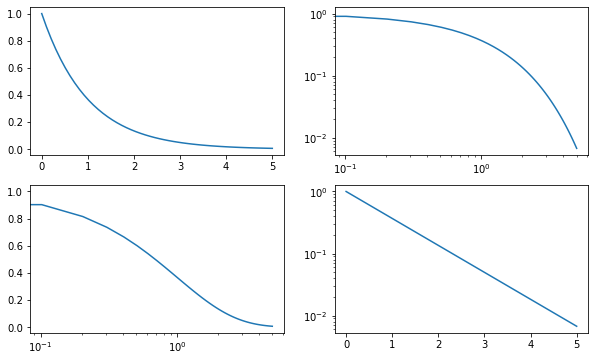

In [22]:
x = np.linspace(0., 5.)
y = np.exp(-x)

# Una figura con cuatro subgráficas
fig, ax = plt.subplots(2,2, figsize=(10,6))

# Dibuja cada eje con diferentes escalas
ax[0,0].plot(x,y) # Normal
ax[0,1].loglog(x,y) #Log en x, Log en y
ax[1,0].semilogx(x,y) # Sólo log en x
ax[1,1].semilogy(x,y); # Sólo log en y

### 3d

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

### Contorno

In [ ]:
# Representa gráficos 3D pero en contornos...
levels = np.arange(-8, 8,0.1 )
plt.contour(x,y,V,levels ,linewidths=4,cmap=cm.coolwarm);

# Algebra Lineal

In [ ]:
from scipy import linalg# Biblioteca para algebra lineal

In [ ]:
x = linalg.solve(A,b)

In [ ]:
linalg.det(A)

In [ ]:
B = np.arange(1,10).reshape(3,3)
det(B)

# Regresion Lineal

In [ ]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [ ]:
def plotGuess(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(X,Y, label="data")
    plt.plot(X, modelo(X, interceptor, pendiente), label='Guess')
    plt.xlabel('Edad (yr)')
    plt.ylabel('Altura (m)')
    plt.legend(loc="best")

In [ ]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

In [ ]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [ ]:
plotModelo(X,Y, r, 3)

# Metodos Montecarlo 

### Volumen Esfera

In [ ]:
volumen_cubo = 2 * 2 * 2 

N = 100000
count = 0
for j in range(N):
    point = np.array([2*random.random()-1, 2*random.random()-1, 2*random.random()-1])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

volumen_esfera = volumen

### Integral 0 a pi de senx

In [ ]:
area_cubo = 1 * np.pi

N = 1000000
count = 0
for j in range(N):
    point = np.array([random.random()*np.pi, random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if np.sin(point[0]) > point[1]:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

area = fraccion * area_cubo

area 

# Metodos Estocásticos

### Caminata Aleatoria

In [23]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sinc', 'var', 'Polygon', 'invert', 'beta', 'product', 'fft', 'eye', 'sinh', 'tan', 'Line2D', 'log', 'binomial', 'trunc', 'partition', 'source', 'cbrt', 'solve', 'gcd', 'Circle', 'exp', 'zeros', 'sin', 'vectorize', 'conjugate', 'roots', 'cosh', 'diag', 'interactive', 'gamma', 'sqrt', 'ones', 'maximum', 'lcm', 'sign', 'cos', 'floor', 'shape', 'prod', 're', 'ifft', 'flatten', 'seterr', 'minimum', 'diff', 'det', 'plot', 'transpose', 'plotting', 'trace', 'nan', 'take', 'pi', 'tanh', 'reshape', 'Number', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:
# Inicialización

pasos = 200
borrachos = 2000

posicion = np.zeros([borrachos, pasos])  # todos empiezan en ceros
tiempo = range(steps)

for borracho in range(borrachos):
    for paso in range(1, pasos):
        if random.choice(['adelante', u'atrás']) == u'atrás':
            posicion[borracho, paso] = posicion[borracho,paso - 1] - 1
        else:
            posicion[borracho, paso] = posicion[borracho,paso - 1] + 1
            

promedio = np.mean(posicion, axis=0) # promedio
rms = np.sqrt(np.mean(np.square(posicion), axis=0)) # media cuadrática 
        

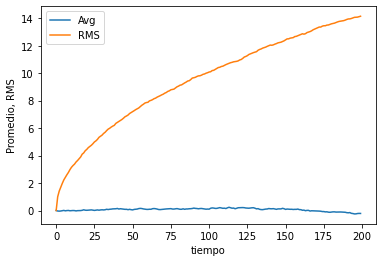

In [32]:
plt.plot(tiempo, promedio, label='Avg')
plt.plot(tiempo, rms, label='RMS')
plt.xlabel('tiempo')
plt.ylabel('Promedio, RMS')
plt.legend(loc='best')

In [33]:
from scipy.optimize import curve_fit

power_law = lambda x, a, b: a*x**b

popt, pcov = curve_fit(power_law, tiempo, rms)

In [37]:
print ("A = %f +/- %f." % (popt[0], sqrt(pcov[0,0])))
print ("B = %f +/- %f." % (popt[1], sqrt(pcov[1,1])))

A = 1.003103 +/- 0.003775.
B = 0.501685 +/- 0.000780.


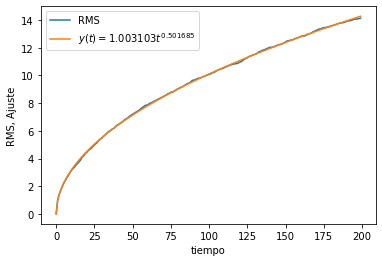

In [34]:
plt.plot(tiempo, rms, label="RMS")
plt.plot(tiempo,power_law(tiempo, popt[0], popt[1]), label=r"$y(t) = %f t ^{%f}$" % (popt[0], popt[1]))
plt.xlabel('tiempo')
plt.ylabel(r'RMS, Ajuste')
plt.legend(loc='best')

# Metodo de Euler

In [ ]:
def euler(y, t, dt, derivadas):        # y=posicion y, t=tiempo del intervalo, dt = tamaño del paso(tau/N-1)
    y_next = y + derivadas(y, t)*dt    # derivadas = depende del sistema, hacer funcion que devuelva un arreglo con 
    return y_next                      # la primera entrada como la primera derivada y segunda entrada como la segunda. 

In [ ]:
def caida_libre(estado, sistema):
    g0 = estado[1]
    g1 = -9.8
    
    return np.array([g0, g1])

In [ ]:
def pendulo_lineal(estado, tiempo, g=g, l=longitud):
    g0 = estado[1]
    g1 = -g/l*estado[0]
    return np.array([g0, g1])

In [ ]:
N = 1000 # número de pasos

x0 = 0.0  # posición inicial

v0 = 0.0  # velocidad inicial

g = -9.8 # aceleración de la gravedad en la tierra

tau = 3.0 # tiempo de la simulación
 
dt = tau/(float)(N-1)  # tamaño del paso

In [ ]:
time = np.linspace(0, tau, N)

In [ ]:
y = np.zeros([N,2])

y[0,0] = x0
y[0,1] = v0

In [ ]:
for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, caida_libre)

# Métodos de Runge-Kutta

In [ ]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

# Metodo de Scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
solucion = odeint(func=pendulo_con_resorte, y0 = y, t = time)

In [ ]:
time = np.linspace(0,25,N)